# Cartpole



The state and control vectors $\textbf{x}$ and $\textbf{u}$ are defined as follows:

$$
\begin{equation*}
\textbf{x} = \begin{bmatrix}
    x & \dot{x} & \theta & \dot{\theta}
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\textbf{u} = \begin{bmatrix}
    F_{x}
    \end{bmatrix}
\end{equation*}
$$

The goal is to swing the carptole upright:
$$
\begin{equation*}
\textbf{x}_{goal} = \begin{bmatrix}
    0 & 0 & \pi & 0
    \end{bmatrix}
\end{equation*}
$$

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pddp
import pddp.examples

In [5]:
import torch
import numpy as np

In [6]:
DT = 0.1  # Time step (s).
RENDER = True  # Whether to render the environment or not.
N = 25 # Horizon length.

# Disable uncertainty since we are dealing with known dynamics.
ENCODING = pddp.StateEncoding.IGNORE_UNCERTAINTY

In [7]:
cost = pddp.examples.cartpole.CartpoleCost()
model = pddp.examples.cartpole.CartpoleDynamicsModel(DT)
env = pddp.examples.cartpole.CartpoleEnv(dt=DT, render=RENDER)

In [8]:
def plot(Z, U):
    t = np.arange(N + 1) * DT
    X = pddp.utils.encoding.decode_mean(Z, ENCODING).detach().numpy()
    U = U.detach().numpy()

    x = X[:, 0]
    x_dot = X[:, 1]
    theta = np.unwrap(X[:, 2])  # Makes for smoother plots.
    theta_dot = X[:, 3]
    
    plt.figure()
    plt.plot(theta, theta_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Orientation Phase Plot")

    plt.figure()
    plt.plot(t, x)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Position path")
    
    plt.figure()
    plt.plot(t, x_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m / s)")
    plt.title("Velocity path")
    
    plt.figure()
    plt.plot(t, theta)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Orientation path")

    plt.figure()
    plt.plot(t, theta_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Angular velocity path")
    
    plt.figure()
    plt.plot(t[:-1], U)
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.title("Action path")
    
    plt.figure()
    plt.plot(J_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Total loss")
    plt.title("Loss path")

In [9]:
def on_iteration(iteration, Z, U, J_opt, accepted, converged):
    J_opt = J_opt.detach().numpy()

    J_hist.append(J_opt)
    info = "CONVERGED" if converged else ("accepted" if accepted else "FAILED")
    final_state = Z[-1].detach().numpy()
    final_state[2] = (final_state[2] + np.pi) % (2 * np.pi) - np.pi
    print("iteration", iteration + 1, info, J_opt, final_state)

In [10]:
controller = pddp.controllers.PDDPController(env, model, cost)

In [11]:
U = 1e-1 * torch.randn(N, model.action_size)

In [12]:
J_hist = []
controller.eval()
Z, U = controller.fit(U, encoding=ENCODING, n_iterations=200, tol=0,
                      on_iteration=on_iteration)

iteration 7 accepted 19.550997 [-0.45521876 -0.73192894 -3.1091654  -0.5320368 ]
iteration 8 accepted 18.595612 [-0.4080706  -0.73605925 -3.0609193  -0.44871068]
iteration 9 FAILED 18.595612 [-0.4080706  -0.73605925 -3.0609193  -0.44871068]
iteration 10 accepted 18.238811 [-0.40404916 -0.83132774 -3.0185914  -0.37245035]
iteration 11 FAILED 18.238811 [-0.40404916 -0.83132774 -3.0185914  -0.37245035]
iteration 12 accepted 17.731825 [-0.21312544 -0.97178435 -2.815201    0.02232182]
iteration 13 FAILED 17.731825 [-0.21312544 -0.97178435 -2.815201    0.02232182]
iteration 14 FAILED 17.731825 [-0.21312544 -0.97178435 -2.815201    0.02232182]
iteration 15 accepted 16.223696 [-0.01624827 -0.61271685 -2.834542    0.01330817]
iteration 18 accepted 16.209808 [-0.01493279 -0.60517836 -2.8376873   0.06032741]
iteration 19 accepted 15.854103 [ 0.04285914 -0.5301565  -2.836691    0.0836252 ]
iteration 21 FAILED 15.854103 [ 0.04285914 -0.5301565  -2.836691    0.0836252 ]
iteration 22 accepted 15.7153

iteration 119 accepted 7.745925 [-0.09412204 -0.08216612  3.0935245   0.03791291]
iteration 120 accepted 7.707359 [-0.08769793 -0.07260263  3.0986412   0.03353718]
iteration 121 accepted 7.489704 [-5.3205509e-02  1.1220936e-02 -3.1376829e+00  2.8840154e-03]
iteration 122 accepted 7.4788637 [-5.1972400e-02  1.0031525e-02 -3.1384413e+00  2.8940737e-03]
iteration 123 accepted 7.4733553 [-5.0755288e-02  9.6373372e-03 -3.1386285e+00  2.8343499e-03]
iteration 124 accepted 7.4687495 [-4.8884276e-02  8.8441819e-03 -3.1390417e+00  2.7358085e-03]
iteration 125 accepted 7.4645157 [-4.7236729e-02  8.5968524e-03 -3.1390224e+00  2.4770796e-03]
iteration 126 accepted 7.4612603 [-4.5288529e-02  7.9621561e-03 -3.1393185e+00  2.3658127e-03]
iteration 127 accepted 7.459635 [-4.4580039e-02  7.9041757e-03 -3.1392679e+00  2.2348017e-03]
iteration 128 accepted 7.454601 [-4.0732510e-02  6.9800578e-03 -3.1396074e+00  1.9538552e-03]
iteration 129 accepted 7.4545813 [-4.0948369e-02  7.0306621e-03 -3.1395748e+00 

/Users/anass/Dev/personal/pddp/pddp/controllers/ilqr.py:235: UserWarning: exceeded max regularization term
  warnings.warn("exceeded max regularization term")


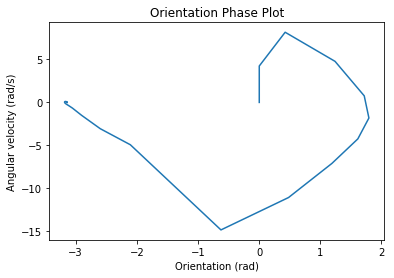

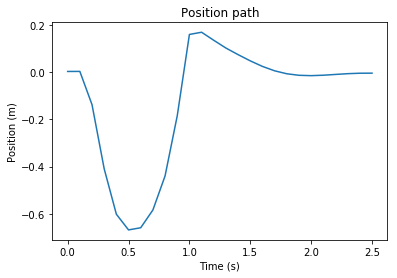

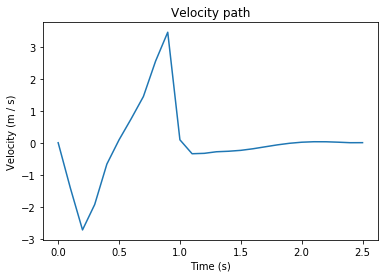

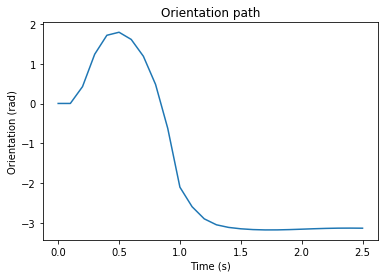

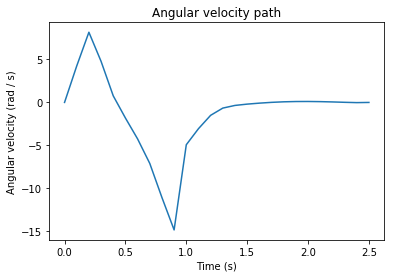

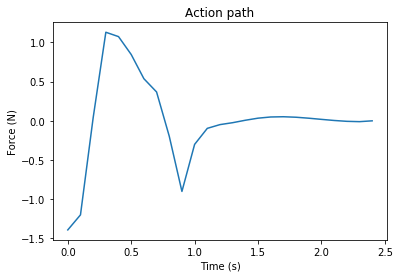

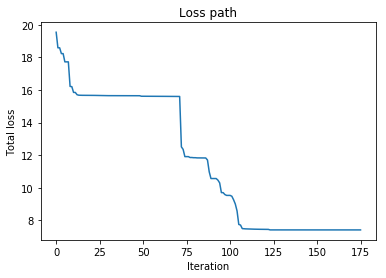

In [13]:
plot(Z, U)

In [14]:
if RENDER:
    # Wait for user interaction before visualizing. 
    _ = input("Press ENTER to continue")

Press ENTER to continue


In [15]:
for u in U:
    env.apply(u)

In [16]:
env.close()